# Ethan's Personal Notebook

In [57]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load in the data
df_raw = pd.read_csv("education_data.csv")
df_raw.columns

Index(['Neighborhood', 'Id', 'Estimate; Total:', 'Margin of Error; Total:',
       'Estimate; Total: - No schooling completed',
       'Margin of Error; Total: - No schooling completed',
       'Estimate; Total: - Nursery school',
       'Margin of Error; Total: - Nursery school',
       'Estimate; Total: - Kindergarten',
       'Margin of Error; Total: - Kindergarten',
       'Estimate; Total: - 1st grade', 'Margin of Error; Total: - 1st grade',
       'Estimate; Total: - 2nd grade', 'Margin of Error; Total: - 2nd grade',
       'Estimate; Total: - 3rd grade', 'Margin of Error; Total: - 3rd grade',
       'Estimate; Total: - 4th grade', 'Margin of Error; Total: - 4th grade',
       'Estimate; Total: - 5th grade', 'Margin of Error; Total: - 5th grade',
       'Estimate; Total: - 6th grade', 'Margin of Error; Total: - 6th grade',
       'Estimate; Total: - 7th grade', 'Margin of Error; Total: - 7th grade',
       'Estimate; Total: - 8th grade', 'Margin of Error; Total: - 8th grade',
   

In [2]:
# Drop unnecessary columns
df = df_raw.drop(columns = [col for col in df_raw.columns if "Margin of Error" in col or col == "Id"])
df.columns

Index(['Neighborhood', 'Estimate; Total:',
       'Estimate; Total: - No schooling completed',
       'Estimate; Total: - Nursery school', 'Estimate; Total: - Kindergarten',
       'Estimate; Total: - 1st grade', 'Estimate; Total: - 2nd grade',
       'Estimate; Total: - 3rd grade', 'Estimate; Total: - 4th grade',
       'Estimate; Total: - 5th grade', 'Estimate; Total: - 6th grade',
       'Estimate; Total: - 7th grade', 'Estimate; Total: - 8th grade',
       'Estimate; Total: - 9th grade', 'Estimate; Total: - 10th grade',
       'Estimate; Total: - 11th grade',
       'Estimate; Total: - 12th grade, no diploma',
       'Estimate; Total: - Regular high school diploma',
       'Estimate; Total: - GED or alternative credential',
       'Estimate; Total: - Some college, less than 1 year',
       'Estimate; Total: - Some college, 1 or more years, no degree',
       'Estimate; Total: - Associate's degree',
       'Estimate; Total: - Bachelor's degree',
       'Estimate; Total: - Master's d

In [3]:
# Count the number of individuals in each neighborhood with at least a high school diploma & save as new column to the dataframe
df["Number w/ Diploma"] = df[df.columns[-9:]].sum(axis=1)
df[["Neighborhood", "Estimate; Total:", "Number w/ Diploma"]]

,Neighborhood,Estimate; Total:,Number w/ Diploma
0,Allegheny Center,791.0,696.0
1,Allegheny West,283.0,255.0
2,Allentown,1611.0,1487.0
3,Arlington,1271.0,1103.0
4,Arlington Heights,182.0,52.0
...,...,...,...
86,Upper Lawrenceville,2028.0,1845.0
87,West End,112.0,112.0
88,West Oakland,772.0,688.0
89,Westwood,2601.0,2268.0


In [4]:
# Divide number of individuals with diploma by total number of individuals to get proportion of individuals with diploma
df["Proportion w/ Diploma"] = df["Number w/ Diploma"] / df["Estimate; Total:"]

# Filter dataframe for important columns only & assign to new dataframe object
df_small = df[["Neighborhood", "Estimate; Total:", "Number w/ Diploma", "Proportion w/ Diploma"]]
df_small

,Neighborhood,Estimate; Total:,Number w/ Diploma,Proportion w/ Diploma
0,Allegheny Center,791.0,696.0,0.879899
1,Allegheny West,283.0,255.0,0.901060
2,Allentown,1611.0,1487.0,0.923029
3,Arlington,1271.0,1103.0,0.867821
4,Arlington Heights,182.0,52.0,0.285714
...,...,...,...,...
86,Upper Lawrenceville,2028.0,1845.0,0.909763
87,West End,112.0,112.0,1.000000
88,West Oakland,772.0,688.0,0.891192
89,Westwood,2601.0,2268.0,0.871972


In [9]:
# Sort by proportion of individuals with diploma
df_small_sorted = df_small.sort_values("Proportion w/ Diploma", ascending=False)
df_small_sorted

,Neighborhood,Estimate; Total:,Number w/ Diploma,Proportion w/ Diploma
57,North Shore,159.0,159.0,1.000000
80,Strip District,611.0,611.0,1.000000
71,South Shore,8.0,8.0,1.000000
87,West End,112.0,112.0,1.000000
64,Point Breeze North,1527.0,1514.0,0.991487
...,...,...,...,...
49,Marshall-Shadeland,4834.0,3567.0,0.737898
58,Northview Heights,551.0,399.0,0.724138
35,Glen Hazel,501.0,340.0,0.678643
4,Arlington Heights,182.0,52.0,0.285714


In [13]:
# Remove NaN values created through zero division and rename column for clarity
education_data = df_small_sorted.fillna(0).rename(columns = {"Estimate; Total:":"Number of People"})
education_data

,Neighborhood,Number of People,Number w/ Diploma,Proportion w/ Diploma
57,North Shore,159.0,159.0,1.000000
80,Strip District,611.0,611.0,1.000000
71,South Shore,8.0,8.0,1.000000
87,West End,112.0,112.0,1.000000
64,Point Breeze North,1527.0,1514.0,0.991487
...,...,...,...,...
49,Marshall-Shadeland,4834.0,3567.0,0.737898
58,Northview Heights,551.0,399.0,0.724138
35,Glen Hazel,501.0,340.0,0.678643
4,Arlington Heights,182.0,52.0,0.285714


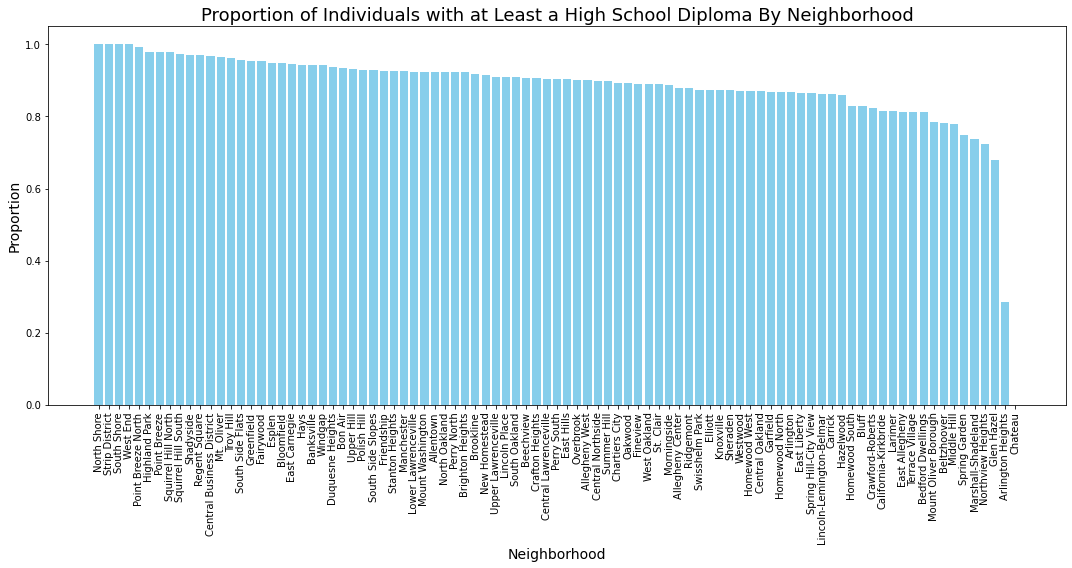

In [55]:
# Visualizing the results (with a bar plot)
plt.figure(figsize=(15, 8))
plt.bar(education_data["Neighborhood"], education_data["Proportion w/ Diploma"], color='skyblue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("Proportion of Individuals with at Least a High School Diploma By Neighborhood", fontsize = 18)
plt.xlabel("Neighborhood", fontsize = 14)
plt.ylabel("Proportion", fontsize = 14)
plt.tight_layout() # Adjusts spacing so all elements fit well within the figure
plt.show()